# Importation de librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from copy import deepcopy
%pylab inline 
import pickle

Populating the interactive namespace from numpy and matplotlib


C:\Users\laeti\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Le jeu de données

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')

In [3]:
data.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,Seattle,WA,98104.0,0939000105,...,7.420912e+05,2532015.0,10020.259770,1002026.0,False,NaN,Compliant,NaN,151.12,2.37


In [4]:
data.shape

(3376, 46)

Classification du type de batiments par la ville de Seattle. 

In [5]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Nous voulons étudier les batiments non destinés à l'habitation. 

In [6]:
#data_new = data[(data['BuildingType'] == 'NonResidential') | (data['BuildingType'] == 'Nonresidential COS') | (data['BuildingType'] == 'Nonresidential WA')| (data['BuildingType'] == 'SPS-District K-12')| (data['BuildingType'] == 'Campus')]
data_new = data[~data['BuildingType'].str.contains('Multifamily')]
data_new.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.529300,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.816410,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.000000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.130860,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.984380,8803998.0,False,NaN,Compliant,NaN,505.01,2.88
5,9,2016,Nonresidential COS,Other,West Precinct,810 Virginia St,Seattle,WA,98101.0,0660000560,...,2.160444e+06,7371434.0,47151.816410,4715182.0,False,NaN,Compliant,NaN,301.81,3.10
6,10,2016,NonResidential,Hotel,Camlin,1619 9th Avenue,Seattle,WA,98101.0,0660000825,...,8.239199e+05,2811215.0,29475.800780,2947580.0,False,NaN,Compliant,NaN,176.14,2.12
7,11,2016,NonResidential,Other,Paramount Theatre,911 Pine St,Seattle,WA,98101.0,0660000955,...,1.065843e+06,3636655.0,3851.890137,385189.0,False,NaN,Compliant,NaN,221.51,2.16
8,12,2016,NonResidential,Hotel,311wh-Pioneer Square,612 2nd Ave,Seattle,WA,98104.0,0939000080,...,2.138898e+06,7297919.0,64259.000000,6425900.0,False,NaN,Compliant,NaN,392.16,2.39
10,15,2016,NonResidential,Hotel,Hotel Monaco Seattle,1101 4th Avenue,Seattle,WA,98101.0,0942000145,...,1.813490e+06,6187627.0,45918.500000,4591850.0,False,NaN,Compliant,NaN,691.26,4.51


In [7]:
data_new.shape

(1668, 46)

Pour les hôtels : L'exploitation d'une activité de résidence hôtelière qui s'accompagne de prestations ne peut correspondre à l'usage d'habitation.

Les bâtiments recevant du public ne sont pas considérés comme des bâtiments d'habitation y compris les résidences de tourisme.

# Nettoyage

## Les colonnes inutiles

In [8]:
col_filter = [col for col in data.columns if data[col].isnull().sum()*100.0/data.shape[0] > 98]
col_filter

['Comments', 'Outlier']

In [9]:
data_new['Comments'].unique()

array([nan])

In [10]:
data_new['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [11]:
data_new['Outlier'].isnull().sum()

1651

In [12]:
col_filter[0]

'Comments'

La colonne ```Comments```ne contient que des nuls et la colonne ```Outlier``` contient 1530 nuls sur 1546 données. 
On peut donc les supprimer sans perdre d'information. On laisse ```Outlier``` pour le moment.

In [13]:
data_new.drop(col_filter[0],1, inplace=True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_27864/3774918874.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new.drop(col_filter[0],1, inplace=True)
C:\Users\laeti\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
data_new.shape

(1668, 45)

On regarde s'il y a des doublons sur les données. 

## Suppression des doublons¶

In [15]:
data_new = data_new.drop_duplicates(keep = 'first')# Pour garder le premier élement dupliqué.
data_new

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [16]:
len(data_new['OSEBuildingID'].unique())

1668

```OSEBuildingID``` est un identifiant unique attribué à chaque propriété couverte par la Seattle Benchmarking Ordinance à des fins de suivi et d'identification. Donc si cet identifiant se repète alors nous avons un doublons. On peut supprimer cette variable qui ne nous servira plus. 

In [17]:
data_new.drop('OSEBuildingID', axis = 1, inplace = True)

## Examinons chaque variable

Nous regardons chaque colonne

In [18]:
data_new.columns.tolist()

['DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [19]:
data_new['DataYear'].unique()

array([2016], dtype=int64)

On regarde les colonnes qui se répètent : 
    ```Electricity(kWh)``` : La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en kWh.
    ```Electricity(kBtu)```: La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
    
    

In [20]:
data_new['Electricity(kWh)'].isnull().sum()

2

In [21]:
data_new['Electricity(kBtu)'].isnull().sum()

2

1 kBtu x 0,2930710702 = 0,2930711 kWh

On va voir si les deux qui sont nuls sont les mêmes lignes. 
Ces deux variables sont redondantes. 

Donc on peut supprimer indépendemment l'un ou l'autre. 
On choisit de supprimer ```Electricity(kBtu)``` 

In [22]:
data_new.drop('Electricity(kBtu)',1, inplace=True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_27864/2211378248.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new.drop('Electricity(kBtu)',1, inplace=True)


In [23]:
data_new.drop('DataYear',1, inplace=True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_27864/1318199984.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new.drop('DataYear',1, inplace=True)


```NaturalGas(therms)```La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en thermes.
```NaturalGas(kBtu)``` La quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).

In [24]:
data_new['NaturalGas(therms)'].isnull().sum()

2

In [25]:
data_new['NaturalGas(kBtu)'].isnull().sum()

2

Donc on peut supprimer indépendemment l'un ou l'autre. 
On choisit de garder ```NaturalGas(therms)``` 

In [26]:
data_new.drop('NaturalGas(kBtu)',1, inplace=True)

C:\Users\laeti\AppData\Local\Temp/ipykernel_27864/477318604.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_new.drop('NaturalGas(kBtu)',1, inplace=True)


In [27]:
def search_suffix(data, suffixe = None):
    component = []
    for c in data.columns:
        if suffixe in c : 
            component.append(c)
    return component

Les variables au suffixe WN sont des mesures normalisées avec des variables climatiques. Cela n'entre pas dans le cadre de notre analyse

In [28]:
search_suffix(data_new, 'WN')

['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [29]:
data_new.drop(search_suffix(data_new, 'WN'), axis=1, inplace = True)

In [30]:
data_new.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'NaturalGas(therms)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [31]:
data_new.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),...,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),TotalGHGEmissions,GHGEmissionsIntensity
count,1652.000000,1668.000000,1668.000000,1668.000000,1668.000000,1666.000000,1668.000000,1.668000e+03,1668.000000,1.668000e+03,...,353.00000,1094.000000,1665.000000,1666.000000,1.666000e+03,1.666000e+03,1.666000e+03,1.666000e+03,1666.000000,1666.000000
mean,98116.819613,4.356715,47.616054,-122.332908,1961.913669,1.168667,4.121103,1.188427e+05,12897.979017,1.059447e+05,...,14923.13994,65.449726,72.158799,175.829892,8.437933e+06,5.125726e+05,1.712630e+06,1.970845e+04,184.973301,1.607845
std,18.430353,2.191048,0.048168,0.024580,32.741755,2.931409,6.563407,2.973622e+05,42274.511185,2.842116e+05,...,36790.55656,28.492928,74.048129,185.932121,3.024380e+07,5.513944e+06,6.095172e+06,9.370814e+04,751.976001,2.336882
min,98006.000000,1.000000,47.499170,-122.411820,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,...,0.00000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-3.382680e+04,0.000000e+00,-0.800000,-0.020000
25%,98105.000000,2.000000,47.585458,-122.343280,1930.000000,1.000000,1.000000,2.947775e+04,0.000000,2.847525e+04,...,2663.00000,48.000000,33.700001,76.450001,1.229291e+06,0.000000e+00,2.114083e+05,0.000000e+00,19.967500,0.350000
50%,98109.000000,4.000000,47.612340,-122.332935,1965.000000,1.000000,2.000000,4.928950e+04,0.000000,4.739150e+04,...,5931.00000,73.000000,51.900002,130.949997,2.554947e+06,0.000000e+00,4.724153e+05,4.982630e+03,49.580000,0.880000
75%,98125.000000,7.000000,47.649675,-122.321675,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.475975e+04,...,12941.00000,89.000000,81.699997,203.950001,6.913348e+06,0.000000e+00,1.420747e+06,1.520000e+04,142.382500,1.890000
max,98199.000000,7.000000,47.733870,-122.258640,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,...,459748.00000,100.000000,834.400024,2620.000000,8.739237e+08,1.349435e+08,1.925775e+08,2.979090e+06,16870.980000,34.090000


In [32]:
data_new[['SiteEnergyUse(kBtu)','TotalGHGEmissions']].isnull().sum()

SiteEnergyUse(kBtu)    2
TotalGHGEmissions      2
dtype: int64

Les variables à predire sont la consommation d'énergie du batiment (SiteEnergyUse(kBtu)) et l'émission de CO2 (TotalGHGEmissions).
Nous allons donc supprimer toutes las valeurs manquantes de ces variables. 

In [33]:
data_new = data_new[~((data_new['SiteEnergyUse(kBtu)'].isnull())|(data_new['TotalGHGEmissions'].isnull()))]


In [34]:
data_new.shape

(1666, 38)

In [35]:
data_new['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [36]:
data_new = data_new[data_new['Outlier'].isnull()]# On garde les données où il n'y a pas d'outliers

In [37]:
data_new.shape

(1649, 38)

In [38]:
data_new.drop('Outlier', axis = 1, inplace = True)

# Analyse exploratoire

## Repartition des type de buildings

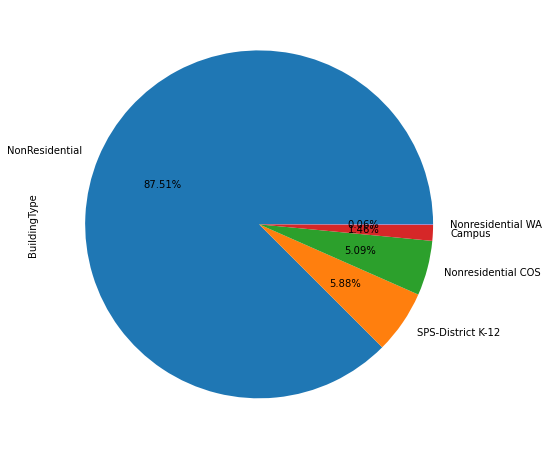

In [39]:
data_building_type_2 = data_new['BuildingType'].value_counts()
ax=data_building_type_2.plot(kind='pie',autopct='%.2f%%',labels=data_building_type_2.index,figsize=(12,8))
plt.show()

In [40]:
data_new.loc[(data_new['BuildingType']== 'NonResidential'), 'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    284
Other                          183
Warehouse                      180
Large Office                   165
Mixed Use Property             101
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             51
Supermarket / Grocery Store     40
Medical Office                  38
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             1
Name: PrimaryPropertyType, dtype: int64

## Matrice de corrélations

In [41]:
data_analyse = deepcopy(data_new)
data_analyse.head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,...,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,...,81.699997,182.500000,7226362.5,2003882.00,1.156514e+06,12764.52930,False,Compliant,249.98,2.83
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,...,94.800003,176.100006,8387933.0,0.00,9.504252e+05,51450.81641,False,Compliant,295.86,2.86
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,...,96.000000,241.899994,72587024.0,21566554.00,1.451544e+07,14938.00000,False,Compliant,2089.28,2.19
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,...,110.800003,216.199997,6794584.0,2214446.25,8.115253e+05,18112.13086,False,Compliant,286.43,4.67
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,...,114.800003,211.399994,14172606.0,0.00,1.573449e+06,88039.98438,False,Compliant,505.01,2.88


In [42]:
CorrMatrix = data_analyse.corr()


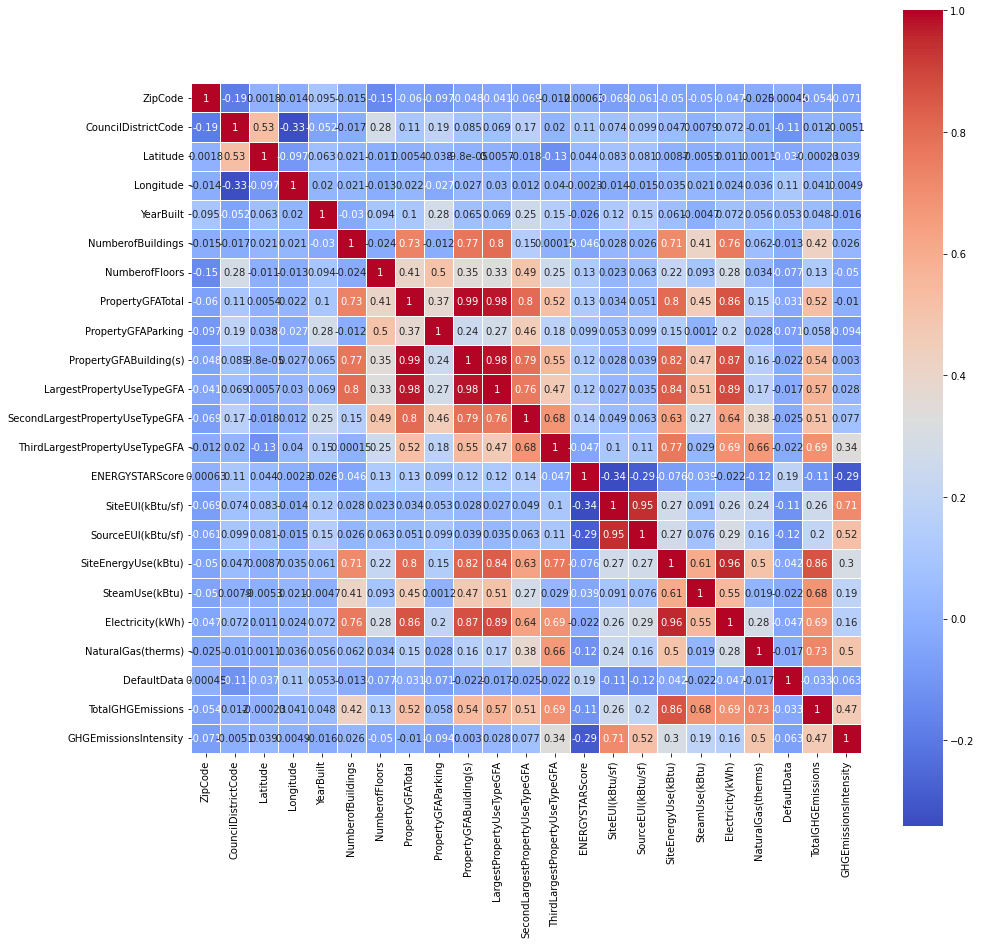

In [43]:
plt.figure(figsize=(15,15))
_= sns.heatmap(CorrMatrix, square = True, annot = True, linewidths = .5, cmap = 'coolwarm')
_= plt.show()

## Featuring engineering

In [44]:
data_analyse.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'NaturalGas(therms)',
 'DefaultData',
 'ComplianceStatus',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [45]:
data_analyse['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Hotel, Parking',
       'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, Retail Store',
       '

On transforme la variable qui est catégorielle en valeur numérique. 

In [46]:
len(data_analyse['ListOfAllPropertyUseTypes'].unique())

372

In [47]:
data_analyse['Total_ListOfAllPropertyUseTypes']=[str(word).count(',')+1 for word in data_analyse['ListOfAllPropertyUseTypes'].str.split(',')]

In [48]:
data_analyse['Total_ListOfAllPropertyUseTypes'].unique()

array([ 1,  3,  2,  5,  4,  6, 11,  9, 13,  7,  8], dtype=int64)

In [49]:
data_analyse[['ListOfAllPropertyUseTypes','Total_ListOfAllPropertyUseTypes']].head(10)

,ListOfAllPropertyUseTypes,Total_ListOfAllPropertyUseTypes
0,Hotel,1
1,"Hotel, Parking, Restaurant",3
2,Hotel,1
3,Hotel,1
4,"Hotel, Parking, Swimming Pool",3
5,Police Station,1
6,Hotel,1
7,Other - Entertainment/Public Assembly,1
8,Hotel,1
10,Hotel,1


On peut supprimer la variable 'ListOfAllPropertyUseTypes'

In [50]:
data_analyse.drop('ListOfAllPropertyUseTypes', axis = 1, inplace= True)

In [51]:
search_suffix(data_analyse, 'GFA')# On cherche toutes les variables qui contiennent 'GFA'

['PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

On calcule les ratios. 

In [52]:
data_analyse['ration_GFA_Parking'] = data_analyse['PropertyGFAParking'].fillna(0)/data_analyse['PropertyGFATotal'].fillna(1)
data_analyse['ration_GFA_Buildings'] = data_analyse['PropertyGFABuilding(s)'].fillna(0)/data_analyse['PropertyGFATotal'].fillna(1)

In [53]:
data_analyse.drop(['PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',  'SecondLargestPropertyUseTypeGFA',  'ThirdLargestPropertyUseTypeGFA'], axis = 1, inplace= True)

In [54]:
data_analyse['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', nan, 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing

In [55]:
data_analyse['LargestPropertyUseType'] = data_analyse['LargestPropertyUseType'].fillna('missing')

In [56]:
data_analyse['NumberofFloors'] = data_analyse['NumberofFloors'].fillna(1)

In [57]:
data_analyse['GFA_by_Buildings'] = data_analyse['PropertyGFATotal']/data_analyse['NumberofBuildings']

In [58]:
data_analyse['GFA_by_Floor'] = data_analyse['PropertyGFATotal']/data_analyse['NumberofFloors']

In [59]:
CorrMatrix = data_analyse.corr()

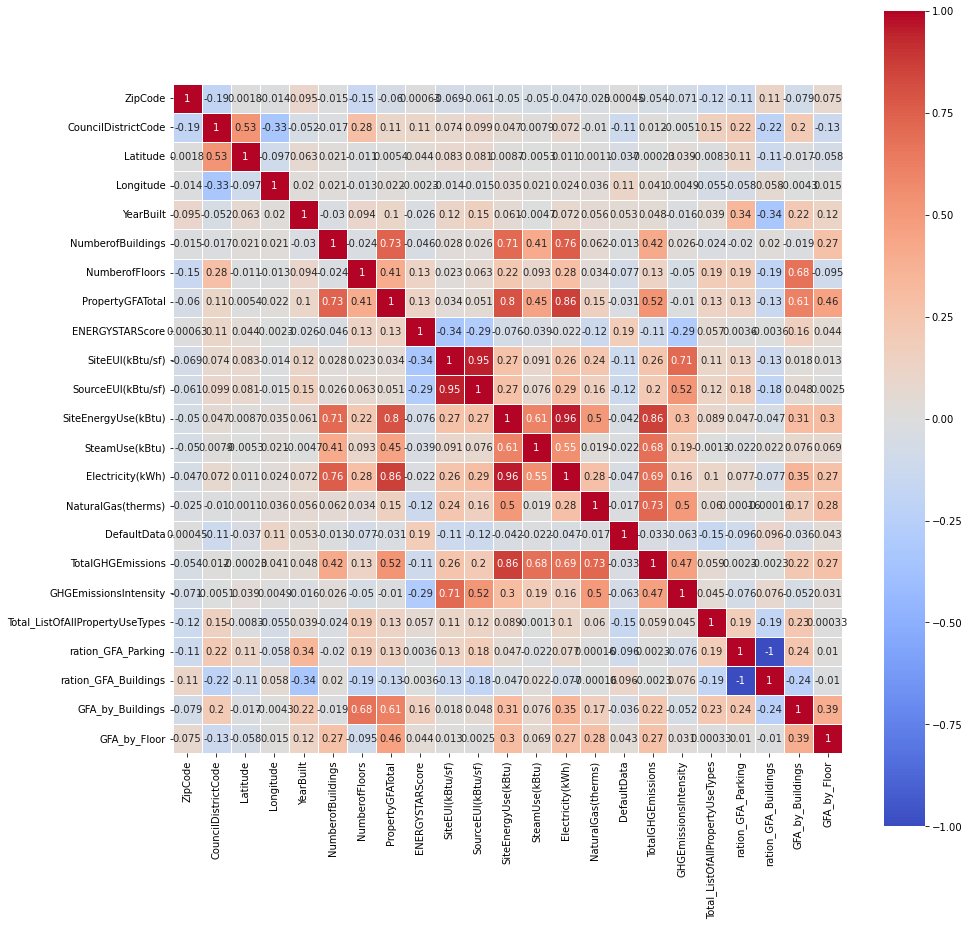

In [60]:
plt.figure(figsize=(15,15))
_= sns.heatmap(CorrMatrix, square = True, annot = True, linewidths = .5, cmap = 'coolwarm')
_= plt.show()

In [61]:
col_to_drop = []

In [62]:
data_analyse.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'NaturalGas(therms)',
 'DefaultData',
 'ComplianceStatus',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'ration_GFA_Parking',
 'ration_GFA_Buildings',
 'GFA_by_Buildings',
 'GFA_by_Floor']

In [63]:
liste_colonnes_nuage_de_points = ['Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors', 
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
  'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'GFA_by_Buildings',
 'GFA_by_Floor']

In [64]:
data_analyse['GFA_by_Floor'].unique()

array([ 7369.5       ,  9415.09090909, 23319.75609756, ...,
       13157.        , 14101.        , 18258.        ])

On supprime les colonnes suivantes 'PropertyGFATotal','NumberofBuildings','SiteEUI(kBtu/sf)', 'Electricity(kWh)','NaturalGas(therms)'

In [65]:
data_analyse.drop(['PropertyGFATotal','NumberofBuildings','SiteEUI(kBtu/sf)', 'Electricity(kWh)','NaturalGas(therms)' ], axis = 1, inplace = True)

In [66]:
CorrMatrix = data_analyse.corr()

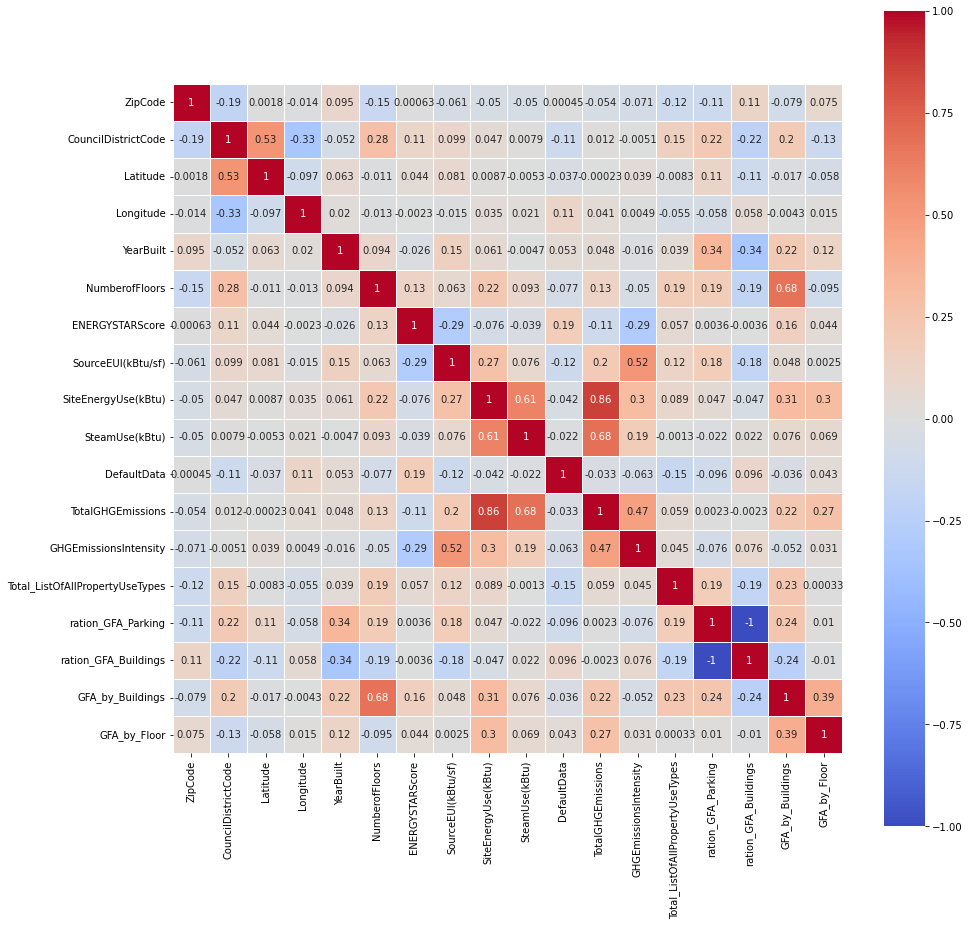

In [67]:
plt.figure(figsize=(15,15))
_= sns.heatmap(CorrMatrix, square = True, annot = True, linewidths = .5, cmap = 'coolwarm')
_= plt.show()

# Analyse statistique


## Analyse univariée et bivariée

### Les histogrammes

Text(0.5, 1.0, 'SiteEnergyUse(kBtu)')

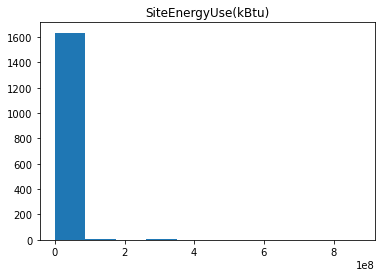

In [68]:
pyplot.hist(data_analyse['SiteEnergyUse(kBtu)'])
#pyplot.xlabel('valeurs')
#pyplot.ylabel('nombres')
pyplot.title('SiteEnergyUse(kBtu)')

Text(0.5, 1.0, 'Histogramme de TotalGHGEmissions')

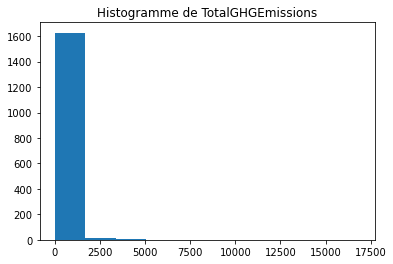

In [69]:
pyplot.hist(data_analyse['TotalGHGEmissions'])
#pyplot.xlabel('valeurs')
#pyplot.ylabel('nombres')
pyplot.title('Histogramme de TotalGHGEmissions')

### Les nuages de points

In [70]:
liste_colonnes = data_analyse.columns.tolist()

In [71]:
 data_analyse.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'ration_GFA_Parking',
 'ration_GFA_Buildings',
 'GFA_by_Buildings',
 'GFA_by_Floor']

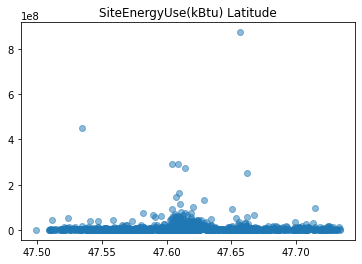

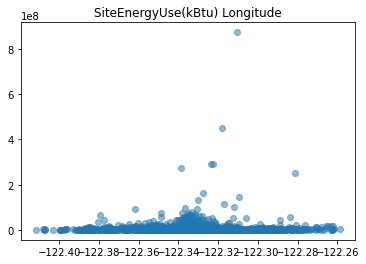

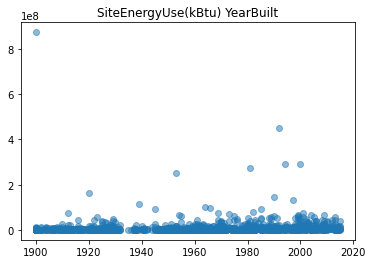

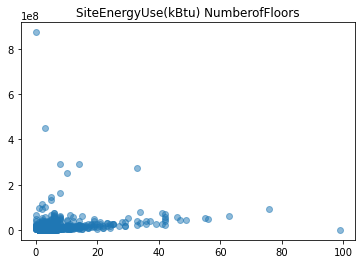

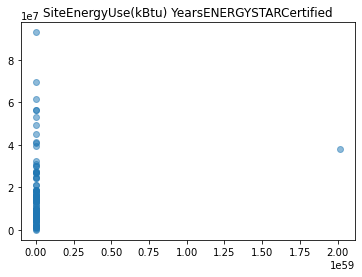

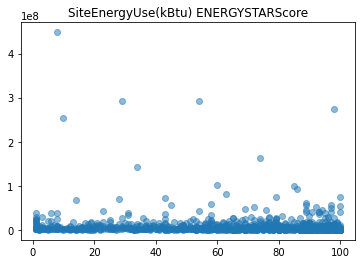

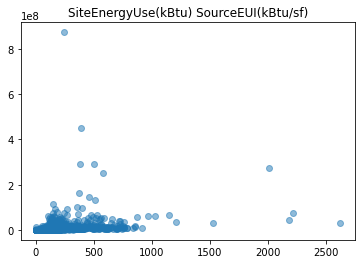

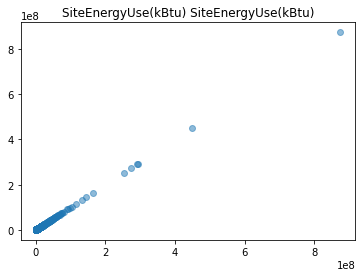

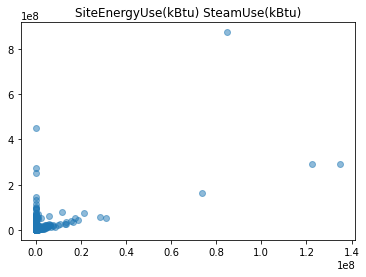

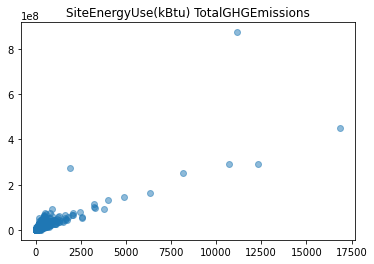

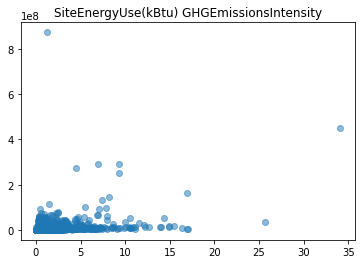

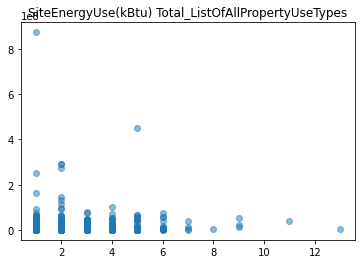

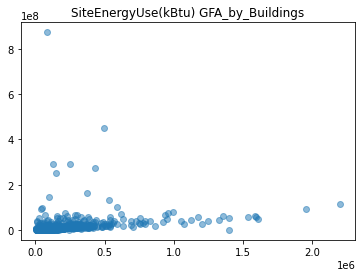

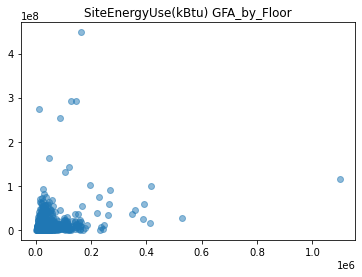

In [72]:
for i in range(len(liste_colonnes_nuage_de_points) ) :    
    plt.scatter(data_analyse[liste_colonnes_nuage_de_points[i]], data_analyse['SiteEnergyUse(kBtu)'],  alpha=0.5)
    plt.title( 'SiteEnergyUse(kBtu)' + ' ' + liste_colonnes_nuage_de_points[i])
    plt.show()

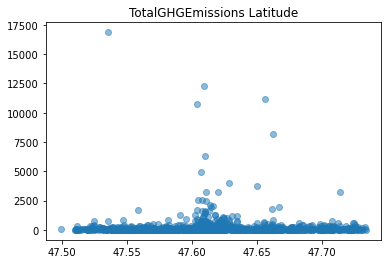

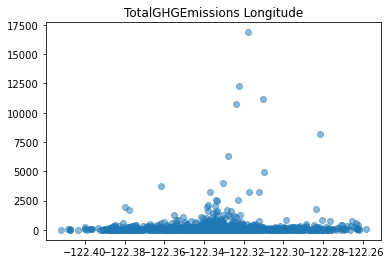

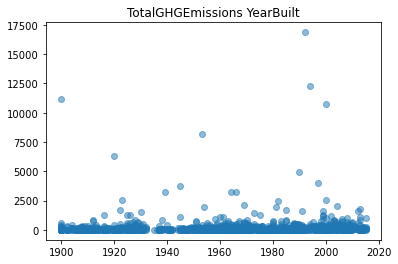

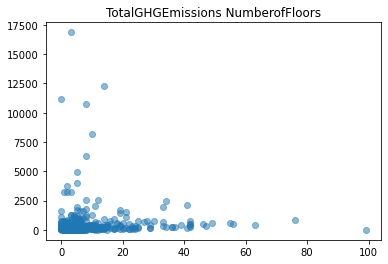

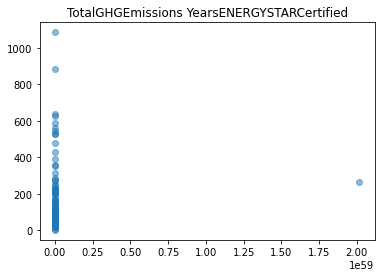

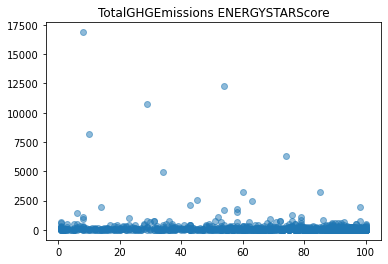

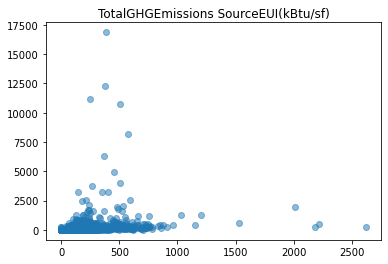

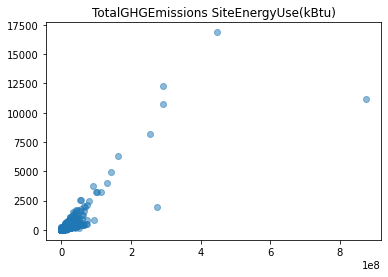

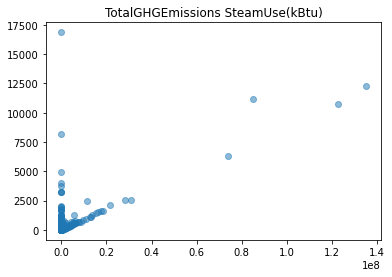

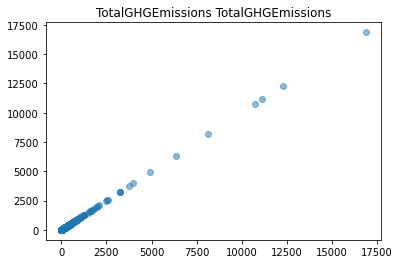

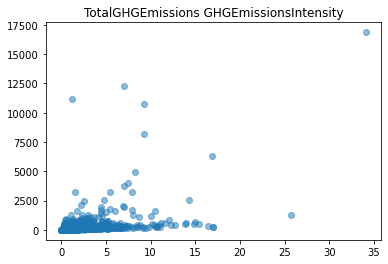

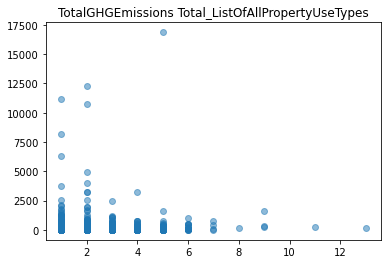

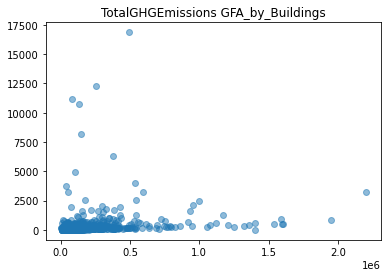

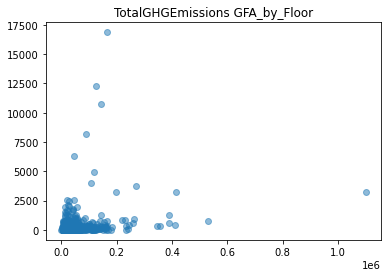

In [73]:
for i in range(len(liste_colonnes_nuage_de_points) ) :    
    plt.scatter(data_analyse[liste_colonnes_nuage_de_points[i]], data_analyse['TotalGHGEmissions'],  alpha=0.5)
    plt.title('TotalGHGEmissions' + ' ' + liste_colonnes_nuage_de_points[i])
    plt.show()

### Les boxplots

On garde les variables quantitatives

In [74]:
liste_colonnes

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'ration_GFA_Parking',
 'ration_GFA_Buildings',
 'GFA_by_Buildings',
 'GFA_by_Floor']

In [75]:
#On prend les variables quantitatives
liste_colonnes_2 = ['CouncilDistrictCode',
  'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'GFA_by_Buildings',
 'GFA_by_Floor']

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


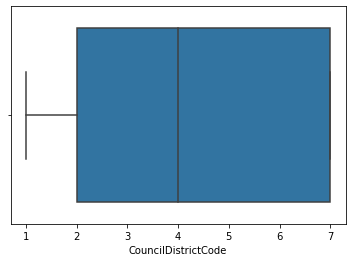

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


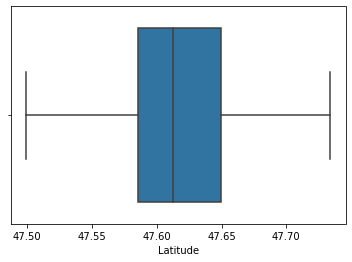

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


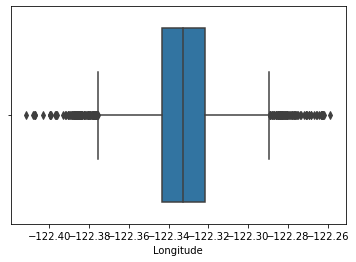

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


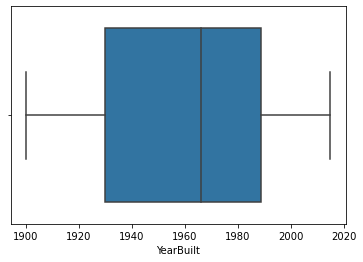

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


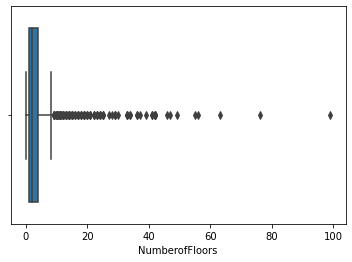

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


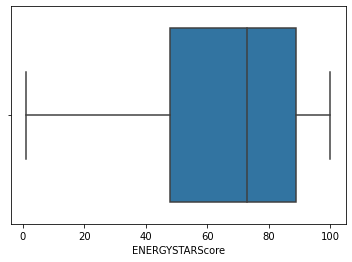

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


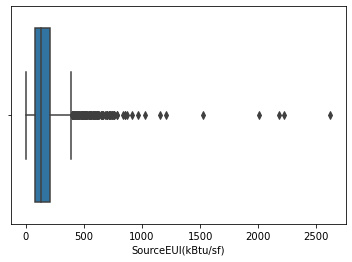

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


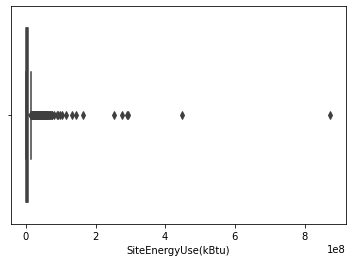

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


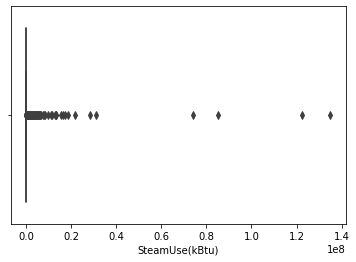

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


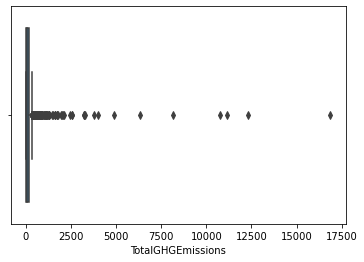

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


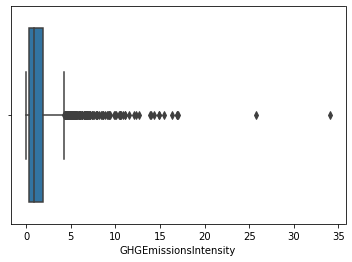

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


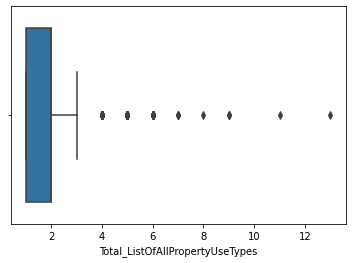

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


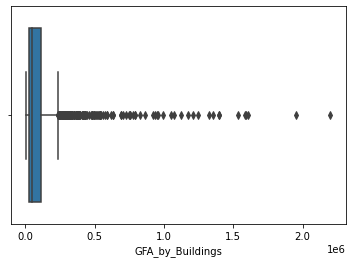

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


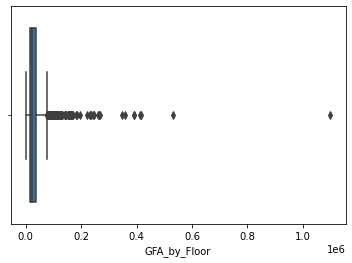

In [76]:
for i in range (len (liste_colonnes_2)):
    #fig, ax = plt.subplots()
    #ax.boxplot(df)
    #plt.show()
    sns.boxplot(data_analyse[liste_colonnes_2[i]])
    plt.show()

#### Traitement des outliers

In [77]:
data_analyse = data_analyse[data_analyse['NumberofFloors'] < 80]

In [78]:
data_analyse = data_analyse[data_analyse['SourceEUI(kBtu/sf)'] < 1500]

In [79]:
data_analyse = data_analyse[data_analyse['SiteEnergyUse(kBtu)'] < 8*(10**8)]

In [80]:
data_analyse = data_analyse[data_analyse['SteamUse(kBtu)'] < 0.6*(10**8)]

In [81]:
data_analyse = data_analyse[data_analyse['TotalGHGEmissions'] <15000]

In [82]:
data_analyse = data_analyse[data_analyse['GHGEmissionsIntensity'] <20]

In [83]:
data_analyse = data_analyse[data_analyse['GFA_by_Buildings'] < 18 * (10**6)]

In [84]:
data_analyse = data_analyse[data_analyse['GFA_by_Floor'] < 0.8 * (10**6)]

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


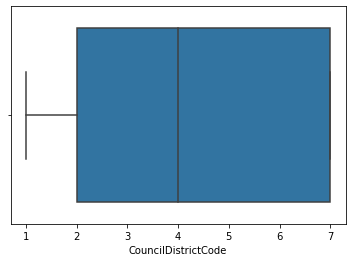

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


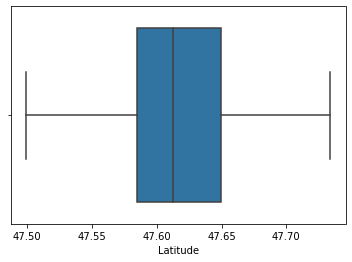

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


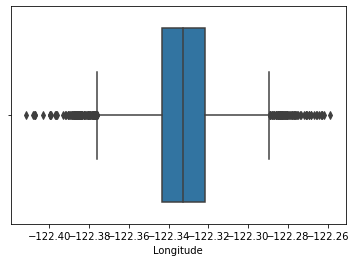

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


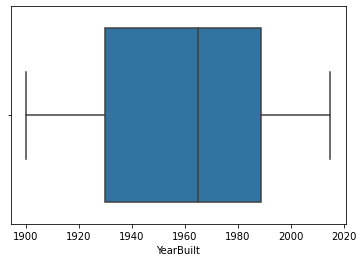

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


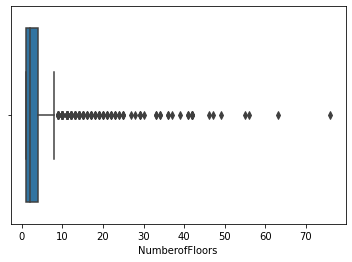

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


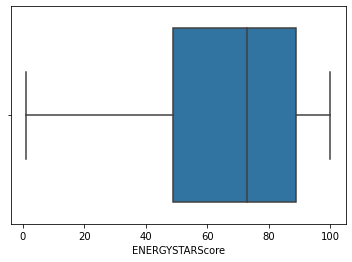

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


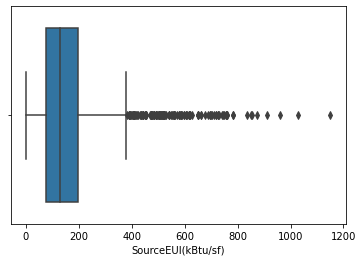

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


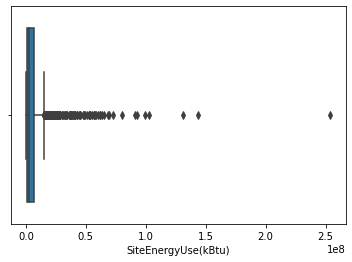

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


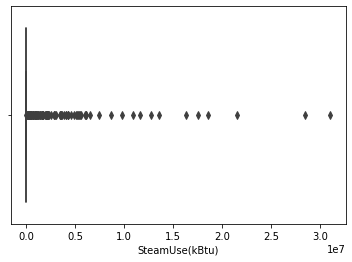

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


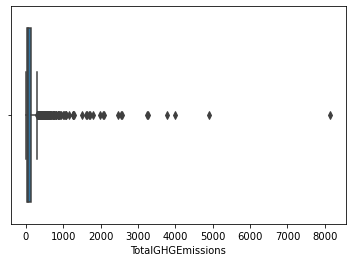

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


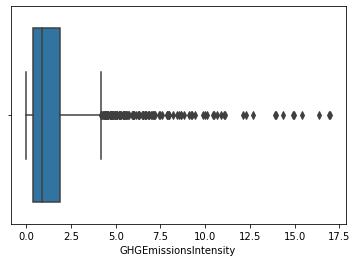

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


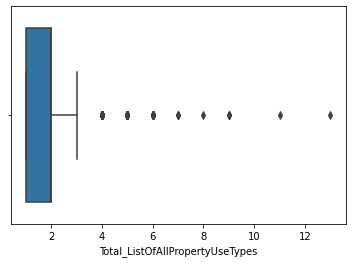

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


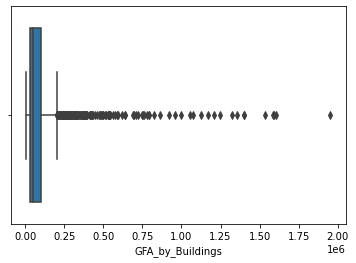

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


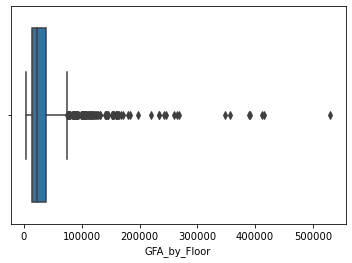

In [85]:
for i in range (len (liste_colonnes_2)):
    #fig, ax = plt.subplots()
    #ax.boxplot(df)
    #plt.show()
    sns.boxplot(data_analyse[liste_colonnes_2[i]])
    plt.show()

In [86]:
data_analyse = data_analyse[data_analyse['SiteEnergyUse(kBtu)'] < 2*(10**8)]

In [87]:
data_analyse = data_analyse[data_analyse['SteamUse(kBtu)'] < 2.5*(10**7)]

In [88]:
data_analyse = data_analyse[data_analyse['TotalGHGEmissions'] < 8000]

In [89]:
data_analyse = data_analyse[data_analyse['GFA_by_Buildings'] < 1.75 * (10**6)]

In [90]:
data_analyse = data_analyse[data_analyse['GFA_by_Floor'] < 300000]

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


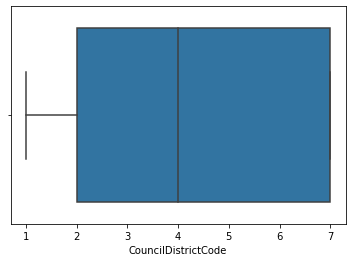

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


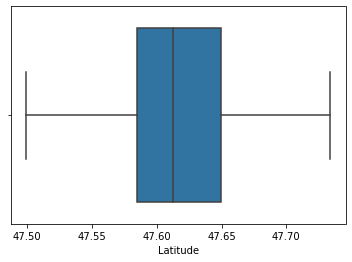

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


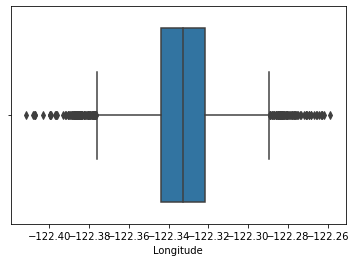

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


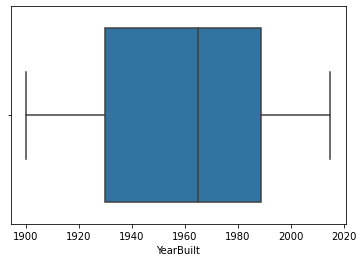

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


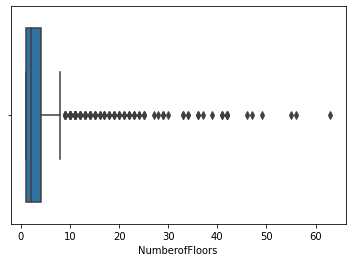

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


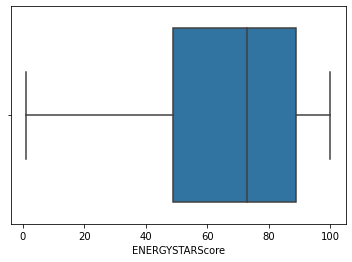

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


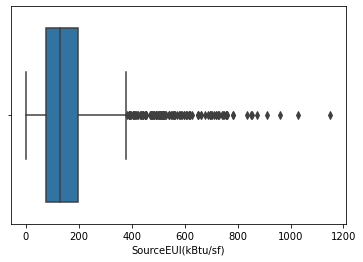

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


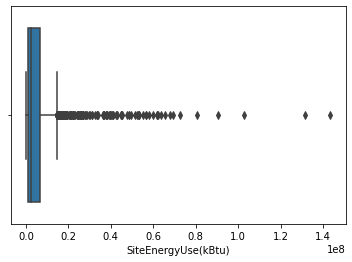

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


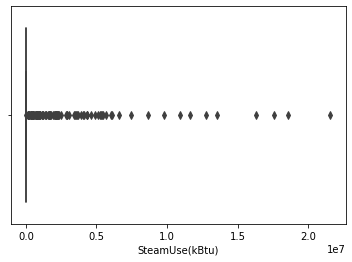

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


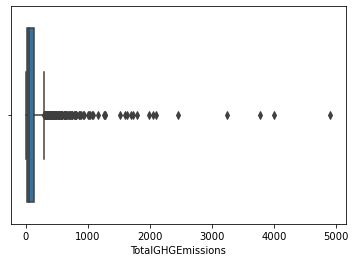

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


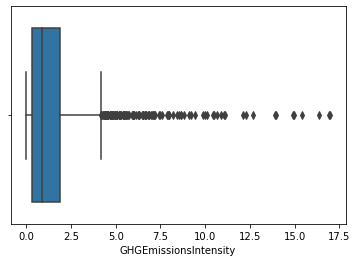

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


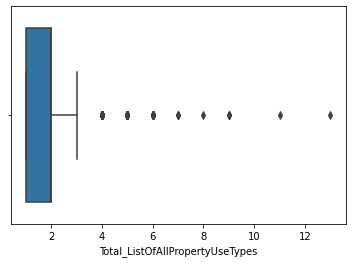

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


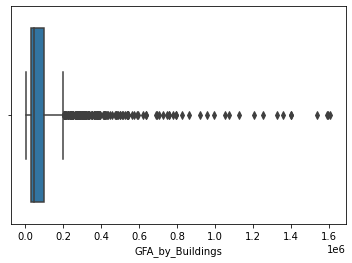

C:\Users\laeti\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


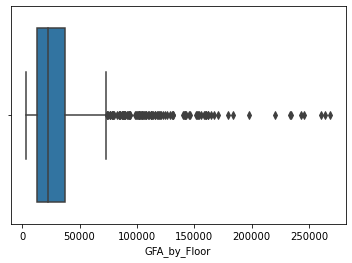

In [91]:
for i in range (len (liste_colonnes_2)):
    #fig, ax = plt.subplots()
    #ax.boxplot(df)
    #plt.show()
    sns.boxplot(data_analyse[liste_colonnes_2[i]])
    plt.show()

Seattle est situé à une Latitude de Seattle  de 47.6062095 et une Longitude de Seattle de -122.3320708

### Les histogrammes

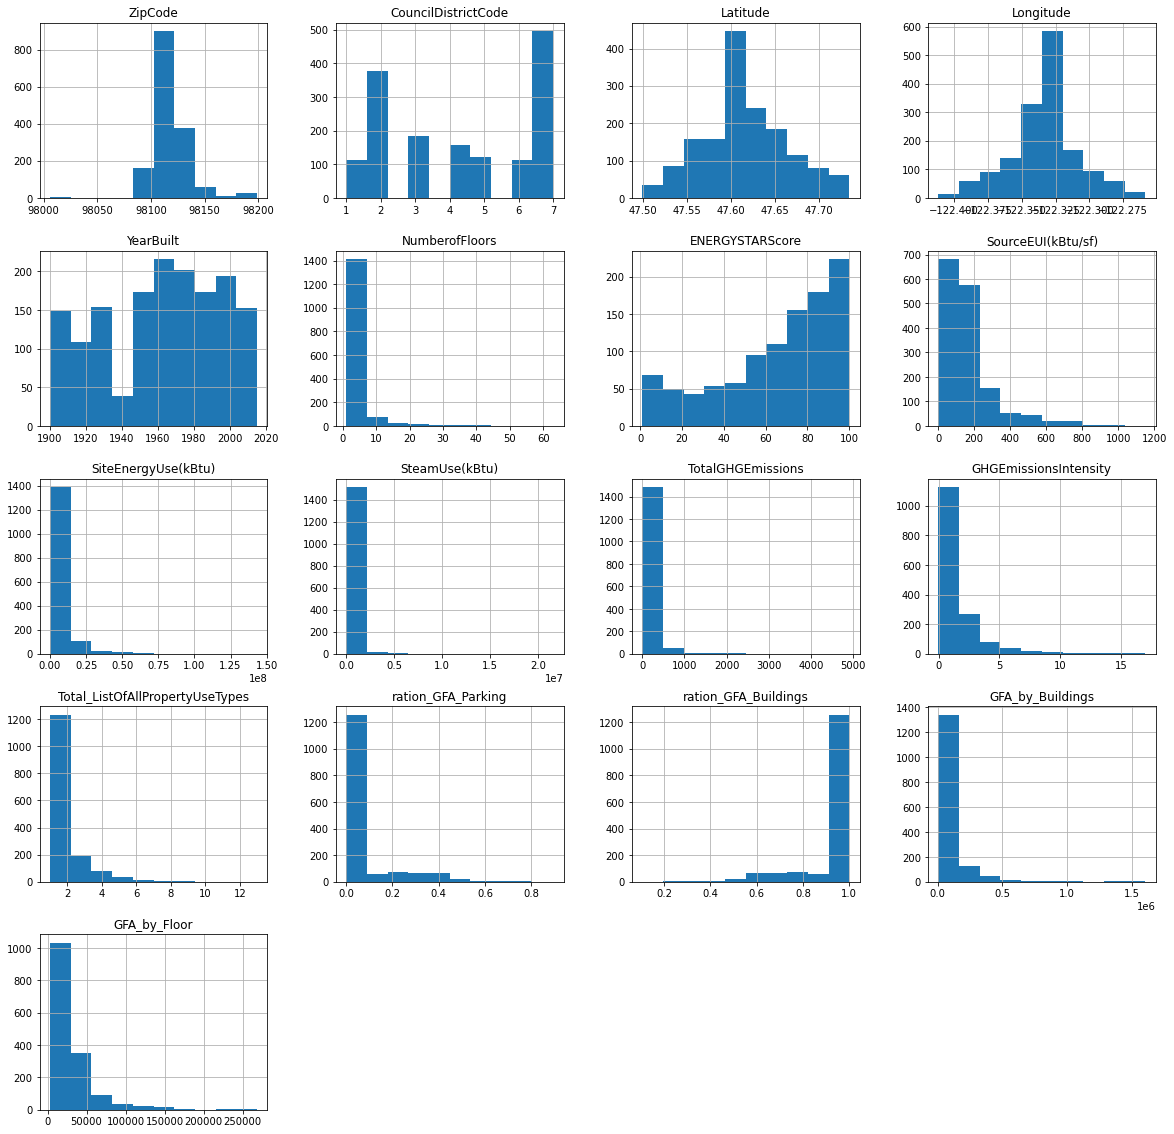

In [92]:
hist = data_analyse.hist(figsize = (20,20))

#  Exploration

In [93]:
data_exploration = deepcopy(data_analyse)
data_exploration.head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,...,SteamUse(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,Total_ListOfAllPropertyUseTypes,ration_GFA_Parking,ration_GFA_Buildings,GFA_by_Buildings,GFA_by_Floor
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,...,2003882.00,False,Compliant,249.98,2.83,1,0.000000,1.000000,88434.0,7369.500000
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,...,0.00,False,Compliant,295.86,2.86,3,0.145453,0.854547,103566.0,9415.090909
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,...,21566554.00,False,Compliant,2089.28,2.19,1,0.205748,0.794252,956110.0,23319.756098
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,...,2214446.25,False,Compliant,286.43,4.67,1,0.000000,1.000000,61320.0,6132.000000
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,...,0.00,False,Compliant,505.01,2.88,3,0.353115,0.646885,175580.0,9754.444444


In [94]:
data_exploration.columns.tolist()

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Total_ListOfAllPropertyUseTypes',
 'ration_GFA_Parking',
 'ration_GFA_Buildings',
 'GFA_by_Buildings',
 'GFA_by_Floor']

Transformer les variables non numériques en numériques

In [95]:
data_exploration.describe()

,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Total_ListOfAllPropertyUseTypes,ration_GFA_Parking,ration_GFA_Buildings,GFA_by_Buildings,GFA_by_Floor
count,1544.000000,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1035.000000,1560.000000,1.560000e+03,1.560000e+03,1560.000000,1560.000000,1560.000000,1560.000000,1560.000000,1.560000e+03,1560.000000
mean,98116.796632,4.361538,47.615946,-122.333212,1961.975000,4.050641,65.505314,167.528974,6.309225e+06,2.147233e+05,131.540910,1.524635,1.889103,0.062542,0.937458,1.016461e+05,31509.364872
std,18.114709,2.198328,0.048360,0.024604,32.654567,5.946468,28.297616,147.192055,1.119085e+07,1.335875e+06,292.285596,2.016593,1.215628,0.141613,0.141613,1.662813e+05,30958.759381
min,98006.000000,1.000000,47.499170,-122.411820,1900.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,-0.800000,-0.020000,1.000000,0.000000,0.104977,4.300000e+03,3230.769231
25%,98105.000000,2.000000,47.584535,-122.343608,1930.000000,1.000000,49.000000,76.599998,1.214835e+06,0.000000e+00,19.850000,0.340000,1.000000,0.000000,1.000000,2.859650e+04,13274.875000
50%,98109.000000,4.000000,47.612460,-122.332920,1965.000000,2.000000,73.000000,128.349998,2.475664e+06,0.000000e+00,48.520000,0.855000,2.000000,0.000000,1.000000,4.687900e+04,22847.970588
75%,98125.000000,7.000000,47.649635,-122.321835,1989.000000,4.000000,89.000000,198.325001,6.510134e+06,0.000000e+00,130.700000,1.870000,2.000000,0.000000,1.000000,9.807300e+04,37428.636364
max,98199.000000,7.000000,47.733870,-122.258640,2015.000000,63.000000,100.000000,1150.300049,1.434230e+08,2.156655e+07,4906.330000,16.990000,13.000000,0.895023,1.000000,1.605578e+06,268500.000000


In [96]:
data_exploration.isnull().sum()

BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofFloors                        0
LargestPropertyUseType                0
SecondLargestPropertyUseType        762
ThirdLargestPropertyUseType        1234
YearsENERGYSTARCertified           1464
ENERGYSTARScore                     525
SourceEUI(kBtu/sf)                    0
SiteEnergyUse(kBtu)                   0
SteamUse(kBtu)                        0
DefaultData                           0
ComplianceStatus                      0
TotalGHGEmissions                     0


In [97]:
data_exploration['SecondLargestPropertyUseType'] = data_exploration['SecondLargestPropertyUseType'].fillna('missing1')

In [98]:
data_exploration['ThirdLargestPropertyUseType'] = data_exploration['ThirdLargestPropertyUseType'].fillna('missing2')

In [99]:
data_exploration.drop(['YearsENERGYSTARCertified'], axis=1, inplace = True)

In [100]:
data_exploration.drop(['GHGEmissionsIntensity'], axis=1, inplace = True)

In [101]:
col_numerics = list(data_exploration.select_dtypes(include = ['int64', 'float64']).columns)
col_categories = list(data_exploration.select_dtypes(exclude = ['int64', 'float64']).columns)

In [102]:
col_categories

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'City',
 'State',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'DefaultData',
 'ComplianceStatus']

In [103]:
col_numerics

['ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofFloors',
 'ENERGYSTARScore',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SteamUse(kBtu)',
 'TotalGHGEmissions',
 'Total_ListOfAllPropertyUseTypes',
 'ration_GFA_Parking',
 'ration_GFA_Buildings',
 'GFA_by_Buildings',
 'GFA_by_Floor']

In [104]:
data_exploration.drop(['ZipCode','CouncilDistrictCode'], axis= 1, inplace = True)

In [105]:
data_exploration.drop(['SourceEUI(kBtu/sf)'], axis= 1, inplace = True)

In [106]:
data_exploration[col_categories].nunique()

BuildingType                        5
PrimaryPropertyType                22
PropertyName                     1556
Address                          1540
City                                1
State                               1
TaxParcelIdentificationNumber    1493
Neighborhood                       19
LargestPropertyUseType             54
SecondLargestPropertyUseType       48
ThirdLargestPropertyUseType        38
DefaultData                         2
ComplianceStatus                    4
dtype: int64

In [107]:
data_exploration.drop(['Address','City','State', 'DefaultData', 'ComplianceStatus'], axis= 1, inplace = True)

In [108]:
data_exploration.drop(['PropertyName'], axis= 1, inplace = True)

In [109]:
data_exploration.drop(['TaxParcelIdentificationNumber'], axis= 1, inplace = True)

In [110]:
col_categories = ['BuildingType','PrimaryPropertyType','Neighborhood','LargestPropertyUseType','SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

In [111]:
data_exploration[col_categories].nunique()

BuildingType                     5
PrimaryPropertyType             22
Neighborhood                    19
LargestPropertyUseType          54
SecondLargestPropertyUseType    48
ThirdLargestPropertyUseType     38
dtype: int64

In [112]:
df1 = pd.get_dummies(data_exploration['BuildingType'], prefix='bd')

In [113]:
df1.reset_index(drop=True, inplace = True)

In [114]:
df1.head()

,bd_Campus,bd_NonResidential,bd_Nonresidential COS,bd_Nonresidential WA,bd_SPS-District K-12
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [115]:
df2 = pd.get_dummies(data_exploration['PrimaryPropertyType'], prefix='pmt')
df2.reset_index(drop=True, inplace = True)

df3 = pd.get_dummies(data_exploration['Neighborhood'], prefix='nb')
df3.reset_index(drop=True, inplace = True)

In [116]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10, input_type='string')
f = h.transform(data_exploration['ThirdLargestPropertyUseType'])
col_names=['ThirdLargestPropertyUseType' +'_'+ str(i) for i in range(10)]
df4 = pd.DataFrame(f.toarray(), columns = col_names )
df4.reset_index(drop=True, inplace=True)

In [117]:
h = FeatureHasher(n_features=10, input_type='string')
f = h.transform(data_exploration['SecondLargestPropertyUseType'])
col_names=['SecondLargestPropertyUseType' +'_'+ str(i) for i in range(10)]
df5 = pd.DataFrame(f.toarray(), columns = col_names )
df5.reset_index(drop=True, inplace=True)

In [118]:
h = FeatureHasher(n_features=10, input_type='string')
f = h.transform(data_exploration['LargestPropertyUseType'])
col_names=['LargestPropertyUseType' +'_'+ str(i) for i in range(10)]
df6 = pd.DataFrame(f.toarray(), columns = col_names )
df6.reset_index(drop=True, inplace=True)

In [119]:
data_exploration.drop(col_categories, axis =1, inplace = True)

In [120]:
data_exploration.reset_index(drop=True, inplace=True)

In [121]:
data_exploration.head(10)

,Latitude,Longitude,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,Total_ListOfAllPropertyUseTypes,ration_GFA_Parking,ration_GFA_Buildings,GFA_by_Buildings,GFA_by_Floor
0,47.61220,-122.33799,1927,12,60.0,7226362.5,2003882.00,249.98,1,0.000000,1.000000,88434.0,7369.500000
1,47.61317,-122.33393,1996,11,61.0,8387933.0,0.00,295.86,3,0.145453,0.854547,103566.0,9415.090909
2,47.61393,-122.33810,1969,41,43.0,72587024.0,21566554.00,2089.28,1,0.205748,0.794252,956110.0,23319.756098
3,47.61412,-122.33664,1926,10,56.0,6794584.0,2214446.25,286.43,1,0.000000,1.000000,61320.0,6132.000000
4,47.61375,-122.34047,1980,18,75.0,14172606.0,0.00,505.01,3,0.353115,0.646885,175580.0,9754.444444
5,47.61623,-122.33657,1999,2,NaN,12086616.0,0.00,301.81,1,0.382349,0.617651,97288.0,48644.000000
6,47.61390,-122.33283,1926,11,27.0,5758795.0,0.00,176.14,1,0.000000,1.000000,83008.0,7546.181818
7,47.61327,-122.33136,1926,8,NaN,6298131.5,2276286.50,221.51,1,0.000000,1.000000,102761.0,12845.125000
8,47.60294,-122.33263,1904,15,43.0,13723820.0,0.00,392.16,1,0.000000,1.000000,163984.0,10932.266667
9,47.60695,-122.33414,1969,11,30.0,16016644.0,5237165.50,691.26,1,0.125872,0.874128,153163.0,13923.909091


In [122]:
X = pd.concat([data_exploration, df1, df2, df3, df4, df5], axis = 1)

In [123]:
X.head()

,Latitude,Longitude,YearBuilt,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),TotalGHGEmissions,Total_ListOfAllPropertyUseTypes,ration_GFA_Parking,...,SecondLargestPropertyUseType_0,SecondLargestPropertyUseType_1,SecondLargestPropertyUseType_2,SecondLargestPropertyUseType_3,SecondLargestPropertyUseType_4,SecondLargestPropertyUseType_5,SecondLargestPropertyUseType_6,SecondLargestPropertyUseType_7,SecondLargestPropertyUseType_8,SecondLargestPropertyUseType_9
0,47.61220,-122.33799,1927,12,60.0,7226362.5,2003882.00,249.98,1,0.000000,...,0.0,-2.0,-1.0,0.0,-1.0,0.0,1.0,-1.0,0.0,-2.0
1,47.61317,-122.33393,1996,11,61.0,8387933.0,0.00,295.86,3,0.145453,...,1.0,-3.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
2,47.61393,-122.33810,1969,41,43.0,72587024.0,21566554.00,2089.28,1,0.205748,...,0.0,-2.0,-1.0,0.0,-1.0,0.0,1.0,-1.0,0.0,-2.0
3,47.61412,-122.33664,1926,10,56.0,6794584.0,2214446.25,286.43,1,0.000000,...,0.0,-2.0,-1.0,0.0,-1.0,0.0,1.0,-1.0,0.0,-2.0
4,47.61375,-122.34047,1980,18,75.0,14172606.0,0.00,505.01,3,0.353115,...,1.0,-3.0,-1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0


In [124]:
X.isnull().sum()

Latitude                            0
Longitude                           0
YearBuilt                           0
NumberofFloors                      0
ENERGYSTARScore                   525
                                 ... 
SecondLargestPropertyUseType_5      0
SecondLargestPropertyUseType_6      0
SecondLargestPropertyUseType_7      0
SecondLargestPropertyUseType_8      0
SecondLargestPropertyUseType_9      0
Length: 79, dtype: int64

# Enregistrer avec pickle

In [125]:
from pickle import *
f = open("Xz","wb")
X = X
dump(X,f)
f.close()